In [4]:
from scipy.io import loadmat
import os

datapath=r'C:\Users\user\Desktop\　　　\2020-1학기\금_데이터마이닝'
imgs=loadmat(os.path.join(datapath, 'Yale_64x64.mat'))

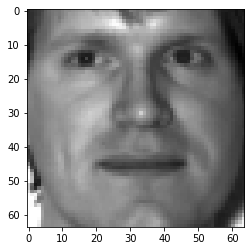

In [10]:
import matplotlib.pyplot as plt
import numpy as np

face=imgs['fea']
plt.imshow(np.reshape(face[0], (64,64)).T, cmap=plt.cm.gray) #face[n]에서 n에 따라 이미지의 인물이 다르다.

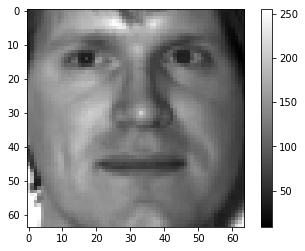

In [13]:
cb=plt.imshow(np.reshape(face[0], (64,64)).T, cmap=plt.cm.gray)
plt.colorbar()

In [16]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(face)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
comps=pca.components_
comps.shape

(165, 4096)

In [19]:
mean_vec=pca.mean_

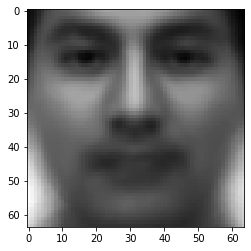

In [20]:
plt.imshow(np.reshape(mean_vec, (64,64)).T, cmap=plt.cm.gray)

#165개(comps.shape에서 확인 가능)의 이미지를 모두 합친 결과

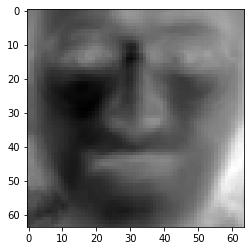

In [21]:
plt.imshow(np.reshape(comps[0], (64,64)).T, cmap=plt.cm.gray)

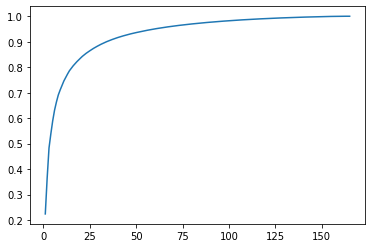

In [22]:
cum_exp_var_ratio=np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,comps.shape[0]+1), cum_exp_var_ratio)

In [25]:
y=imgs['gnd'].flatten() #1D-array로 바꿔줌

classes=np.unique(y)
print(classes)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [30]:
all_ind=range(len(y))
val_ind=np.array([np.random.choice(np.where(y==i)[0],1) for i in classes]).flatten()

train_ind=np.setdiff1d(all_ind, val_ind)

In [31]:
Xtrn=face[train_ind]
Ytrn=y[train_ind]
Xval=face[val_ind]
Yval=y[val_ind]

In [33]:
pca=PCA()
pca.fit(Xtrn)

comp=pca.components_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

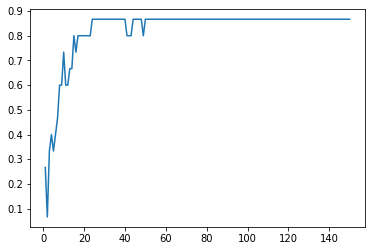

In [39]:
Xtrn_T=pca.transform(Xtrn)
Xval_T=pca.transform(Xval)

from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(max_iter=300)

result=[]
for npc in range(1,comp.shape[0]+1):
    clf.fit(Xtrn_T[:,:npc],Ytrn)
    result.append(clf.score(Xval_T[:,:npc],Yval))
    
clf.fit(Xtrn,Ytrn)
acc_orig=clf.score(Xval,Yval)

plt.plot(range(1,comp.shape[0]+1),result)

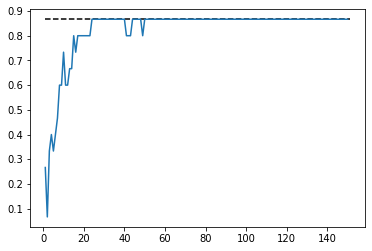

In [41]:
plt.plot(range(1,comp.shape[0]+1),result)
plt.hlines(acc_orig,1,comp.shape[0]+1,ls='--')